## Deep Learning using the coursera tutorial

## 1.Coding the different fonctions

In [260]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd

In [261]:
def sigmoid(Z):
    """ parameter : Z an array
        return sigmoid(Z) an array"""
    A=1/(1+np.exp(-Z))
    cache=Z
    assert(A.shape == Z.shape)
    return A,cache

In [262]:
x=np.zeros(5)-1
sigmoid(x)

(array([0.26894142, 0.26894142, 0.26894142, 0.26894142, 0.26894142]),
 array([-1., -1., -1., -1., -1.]))

In [263]:
def relu(Z):
    """ parameter : Z an array
        return sigmoid(Z) an array"""
    A=np.where(Z>=0,Z,0)
    cache=Z
    
    assert(A.shape == Z.shape)
    
    return A,cache
    

In [264]:
relu(x)

(array([0., 0., 0., 0., 0.]), array([-1., -1., -1., -1., -1.]))

In [265]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [266]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## 2-Layer Neural Network

In [267]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [268]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z =  np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [269]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [270]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [271]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [272]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [273]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] += -learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] += -learning_rate*grads["db" + str(l+1)]
        
    ### END CODE HERE ###
    return parameters

## Dataset but with no transformation

In [274]:
historic_price = pd.read_csv("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/scripts_Python/data/historic_price/"+'BNP'+".PA.csv", sep=",")
X_clf = np.array(historic_price.drop(['Date','Close','Adj close'], axis=1).values)
y = np.array(historic_price['Close'].values)
X_clf=X_clf[1:,:]
y_clf=np.zeros((1,len(y)-1))
for i in range(len(y)-1):
    if y[i]>=y[i+1]:
        y_clf[0,i]=1
        
y_clf=np.array(y_clf)
X_clf=X_clf.T


In [275]:
np.squeeze(y_clf)
print(X_clf.shape)
print(y_clf.shape)

(4, 1277)
(1, 1277)


In [276]:
n_x = 4     
n_h = 3
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [277]:
def predict_2(X,Y,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z,cache1=linear_activation_forward(X, W1, b1, "relu")
    A,cache2=linear_activation_forward(Z, W2, b2, "sigmoid")
    A=np.where(A>=0.5,1,0)
    
    return 1-np.mean(abs(Y-A))
    

In [278]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [279]:
from sklearn import model_selection
from sklearn import preprocessing
Xtr, Xte, ytr, yte = model_selection.train_test_split(X_clf.T, y_clf.T, 
                                                      test_size=0.3)

Xtr = preprocessing.scale(Xtr)

Xtr, Xte, ytr, yte =Xtr.T, Xte.T, ytr.T, yte.T

In [280]:
Xtr.shape


(4, 893)

Cost after iteration 0: 0.6931478143212833
Cost after iteration 100: 0.6914305285529037
Cost after iteration 200: 0.6894886578660798
Cost after iteration 300: 0.6892041458037835
Cost after iteration 400: 0.6890971532072452
Cost after iteration 500: 0.6890717798196817
Cost after iteration 600: 0.6890539894749947
Cost after iteration 700: 0.689034369943563
Cost after iteration 800: 0.689017386924149
Cost after iteration 900: 0.6889992106190254
Cost after iteration 1000: 0.6889793751394346
Cost after iteration 1100: 0.6889581632649592
Cost after iteration 1200: 0.688936140021534
Cost after iteration 1300: 0.6889121634154992
Cost after iteration 1400: 0.6888817081641244
Cost after iteration 1500: 0.6888485420787501
Cost after iteration 1600: 0.6888150704391541
Cost after iteration 1700: 0.6887777129631099
Cost after iteration 1800: 0.6887308861356488
Cost after iteration 1900: 0.6886663388142185
Cost after iteration 2000: 0.6885991644303454
Cost after iteration 2100: 0.6885293248485362
Cos

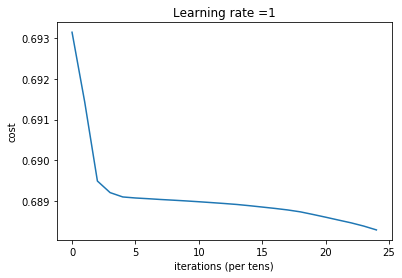

In [281]:
parameters = two_layer_model(Xtr, ytr,learning_rate = 1 ,layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [282]:
predictions_train = predict_2(Xtr, ytr, parameters)
print(predictions_train)

0.5520716685330347


## L-Layer Network

In [283]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [284]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [285]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [286]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layer_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [287]:
from sklearn import model_selection
from sklearn import preprocessing
Xtr, Xte, ytr, yte = model_selection.train_test_split(X_clf.T, y_clf.T, 
                                                      test_size=0.3)

Xtr = preprocessing.scale(Xtr)

Xtr, Xte, ytr, yte =Xtr.T, Xte.T, ytr.T, yte.T

In [288]:
def predict_L(X,Y,parameters):
    A,caches=L_model_forward(X, parameters)
    A=np.where(A>=0.5,1,0)
    
    return 1-np.mean(abs(Y-A))

In [289]:
layer_dims=[4,5,6,4,3,5,4,5,6,1]

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692102
Cost after iteration 200: 0.691383
Cost after iteration 300: 0.690889
Cost after iteration 400: 0.690550
Cost after iteration 500: 0.690317
Cost after iteration 600: 0.690156
Cost after iteration 700: 0.690046
Cost after iteration 800: 0.689970
Cost after iteration 900: 0.689918
Cost after iteration 1000: 0.689882
Cost after iteration 1100: 0.689857
Cost after iteration 1200: 0.689840
Cost after iteration 1300: 0.689828
Cost after iteration 1400: 0.689820
Cost after iteration 1500: 0.689814
Cost after iteration 1600: 0.689811
Cost after iteration 1700: 0.689808
Cost after iteration 1800: 0.689806
Cost after iteration 1900: 0.689805
Cost after iteration 2000: 0.689804
Cost after iteration 2100: 0.689803
Cost after iteration 2200: 0.689803
Cost after iteration 2300: 0.689803
Cost after iteration 2400: 0.689803
Cost after iteration 2500: 0.689802
Cost after iteration 2600: 0.689802
Cost after iteration 2700: 0.689802
Cost

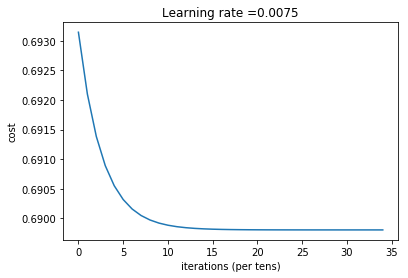

In [290]:
parameters = L_layer_model(Xtr, ytr,layers_dims,learning_rate=0.0075, num_iterations = 3500, print_cost = True)

In [291]:
predict_L(Xtr,ytr,parameters)

0.5408734602463605

In [292]:
Xte=preprocessing.scale(Xte)
predict_L(Xte,yte,parameters)

0.46354166666666663

## Creating a matrix of depth k

In [293]:
#################
stock = "BNP.PA"#
#################
from datetime import datetime

dataFrame = pd.read_csv("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/script_macro/"+stock+".csv", sep=",")
# les valeurs les plus recentes en haut
data = np.array(dataFrame.values)[::-1]
initialData = np.array(dataFrame.values)[::-1]

initialHeader= list(dataFrame)
header = list(dataFrame)


# ici data ne comporte que les donnees series de prix

In [294]:
# inflation
inflation = pd.read_excel("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/script_macro/"+"Inflation.xlsx")
temp = np.array(inflation.values)

inflation_values = []
for i in range(len(temp)):
    if len(str(int(temp[i][1]))) < 2:
        date = datetime.strptime(str(int(temp[i][0]))+"-0"+str(int(temp[i][1])), '%Y-%m')
    else:
        date = datetime.strptime(str(int(temp[i][0]))+"-"+str(int(temp[i][1])), '%Y-%m')
    value = float(int(1000*temp[i][2]))/1000
    inflation_values.append([date,value])


In [295]:
# consumer sentiment
consumer_sentiment = pd.read_excel("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/script_macro/"+"the index of the consumer sentiment.xlsx")
temp = np.array(consumer_sentiment.values)

consumer_sentiment_values = []
for i in range(len(temp)):
    if len(str(int(temp[i][1]))) < 2:
        date = datetime.strptime(str(int(temp[i][0]))+"-0"+str(int(temp[i][1])), '%m-%Y')
    else:
        date = datetime.strptime(str(int(temp[i][0]))+"-"+str(int(temp[i][1])), '%m-%Y')
    value = float(int(1000*temp[i][2]))/1000
    consumer_sentiment_values.append([date,value])

In [296]:
# interest rates fed
interest_rates = pd.read_excel("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/script_macro/"+"interest rates fed.xlsx")
interest_values = np.array(interest_rates.values)

In [297]:
# euro-dollar rate
euro_dollar = pd.read_excel("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/script_macro/"+"EUR_DOLL.xlsx")
euro_dollar_values = np.array(euro_dollar.values)

In [298]:
def add_to_data(data,list_usedData,parameter_values,name_parameter):
    data_temp = []
    
    for i in range(len(data)):
        vector = []
        for k in range(len(data[i])):
            vector.append(data[i][k])
        date = datetime.strptime(data[i][0], '%Y-%m-%d')
        if date < parameter_values[0][0]:
            vector.append(parameter_values[0][1])
        else:
            index = 0
            while date > parameter_values[index][0] and index < len(parameter_values)-1:
                index += 1
            if index < len(parameter_values)-1:
                vector.append(parameter_values[index][1])
                # approximation en escalier
            else:
                vector.append(parameter_values[-1][1])
        data_temp.append(vector)   
        
    list_usedData.append(name_parameter)
    return data_temp

In [299]:
data = add_to_data(data,header,inflation_values, "Inflation")
data = add_to_data(data,header,consumer_sentiment_values, "Consumer sentiment")
data = add_to_data(data,header,interest_values, "Interest rates fed")
data = add_to_data(data,header,euro_dollar_values,"euro-dollar" )

In [300]:
header

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Inflation',
 'Consumer sentiment',
 'Interest rates fed',
 'euro-dollar']

In [301]:
def create_data_matrix(matrix,k):
    """ k : integer """
    p=matrix.shape[1]
    n=matrix.shape[0]
    data_matrix=np.zeros((n-k,p*k))
    for i in range(k):
        for j in range(n-k):
            data_matrix[j,i*p:(i+1)*p]=matrix[j+i,:]
    return data_matrix



In [302]:
dataframe=pd.DataFrame(data,columns=header)
data = np.array(dataframe.drop(['Date','Close','Adj Close'], axis=1).values)
print(data)
data.shape

[[63.740002 64.279999 63.130001 ... 95.7       1.41      1.2263  ]
 [64.07     64.660004 62.25     ... 95.7       1.41      1.2273  ]
 [64.589996 65.709999 63.939999 ... 95.7       1.41      1.2252  ]
 ...
 [46.560001 47.215    46.005001 ... 78.6       0.14      1.3325  ]
 [46.299999 47.5      46.200001 ... 78.6       0.14      1.3327  ]
 [46.029999 46.119999 45.279999 ... 78.6       0.14      1.348   ]]


(1278, 8)

In [303]:
k=1
new_data=create_data_matrix(data,k)
new_data=new_data[1:,:]
new_data.shape

(1276, 8)

In [304]:
y=np.array(dataframe['Close'].values)
new_y=np.zeros((len(y)-(k+1),1))
for i in range(len(y)-(k+1)):
    if y[i]>y[i+1]:  
        new_y[i,0]=1
new_y=np.array(new_y)
print(new_y.shape)
np.squeeze(new_y)
print(new_y.shape)

(1276, 1)
(1276, 1)


In [305]:
layer_dims=[8,1]

In [306]:
from sklearn import model_selection
Xtr, Xte, ytr, yte = model_selection.train_test_split(new_data, new_y, 
                                                      test_size=0.3)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(Xtr)  
Xtr = scaler.transform(Xtr)  
# apply same transformation to test data
Xte= scaler.transform(Xte)

Xtr, Xte, ytr, yte =Xtr.T, Xte.T, ytr.T, yte.T

Cost after iteration 0: 0.692702
Cost after iteration 100: 0.692381
Cost after iteration 200: 0.692117
Cost after iteration 300: 0.691897
Cost after iteration 400: 0.691714
Cost after iteration 500: 0.691560
Cost after iteration 600: 0.691429
Cost after iteration 700: 0.691318
Cost after iteration 800: 0.691223
Cost after iteration 900: 0.691140
Cost after iteration 1000: 0.691068
Cost after iteration 1100: 0.691005
Cost after iteration 1200: 0.690949
Cost after iteration 1300: 0.690899
Cost after iteration 1400: 0.690854
Cost after iteration 1500: 0.690814
Cost after iteration 1600: 0.690777
Cost after iteration 1700: 0.690744
Cost after iteration 1800: 0.690713
Cost after iteration 1900: 0.690685
Cost after iteration 2000: 0.690659
Cost after iteration 2100: 0.690635
Cost after iteration 2200: 0.690612
Cost after iteration 2300: 0.690591
Cost after iteration 2400: 0.690572
Cost after iteration 2500: 0.690554
Cost after iteration 2600: 0.690536
Cost after iteration 2700: 0.690520
Cost

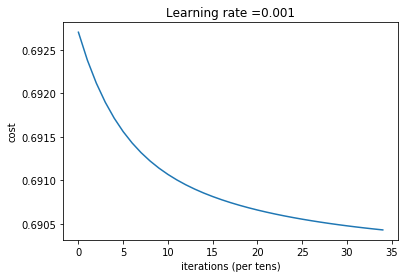

In [307]:
parameters = L_layer_model(Xtr, ytr,layers_dims,learning_rate=0.001, num_iterations = 3500, print_cost = True)

## Using the built-up fonctions from sklearn : MLPClassifier

In [308]:
from sklearn.neural_network import MLPClassifier

In [309]:
from sklearn import model_selection
alpha=10.0 ** -np.arange(1, 7)
param_grid = {'alpha': alpha}

ytr = ytr.reshape((-1,)) 
yte = yte.reshape((-1,))
print("yte : "+str(yte.shape))


yte : (383,)


In [310]:
clf = MLPClassifier(solver='adam',activation="relu", alpha=0, learning_rate="constant",
...                     hidden_layer_sizes=(100,50,30,20),max_iter=5000,random_state=1)

In [311]:
clf.fit(Xtr.T,ytr.T)

MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 30, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [312]:
from sklearn import metrics
y_pred=clf.predict(Xte.T)
print("Accuracy: %.3f" % metrics.accuracy_score(yte.T, y_pred))

Accuracy: 0.517


## Gridsearch

In [313]:

from sklearn import model_selection
alpha=10.0 ** -np.arange(1, 7)
param_grid = {'alpha': alpha}

In [314]:
clf_1= MLPClassifier(solver='adam', learning_rate="invscaling",
...                     hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100,100,100,100,100,2),max_iter=3500,random_state=1)
clf_opt=model_selection.GridSearchCV(clf_1,param_grid,cv=3)
clf_opt.fit(Xtr.T,ytr.T)

/Users/serrano/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 2),
       learning_rate='invscaling', learning_rate_init...le=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [315]:
print(clf_opt.best_estimator_)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 2),
       learning_rate='invscaling', learning_rate_init=0.001, max_iter=3500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [316]:
ypred=clf_opt.best_estimator_.predict(Xte.T)

In [317]:
print("Accuracy: %.3f" % metrics.accuracy_score(yte.T, y_pred))

Accuracy: 0.517


In [318]:
MLPClassifier?

## Transformation des cours des prix en rapport 

In [320]:
historic_price = pd.read_csv("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/scripts_Python/data/historic_price/"+'BNP'+".PA.csv", sep=",")
X_clf = np.array(historic_price.drop(['Date','Adj close'], axis=1).values)
y = np.array(historic_price['Close'].values)


In [321]:
def create_zero_one(y):
    y=np.array(y)
    n=y.shape[0]
    y_clf=np.zeros(n-2)
    for i in range(n-2):
        if y[i]>=y[i+1]:
            y_clf[i]=1
    return y_clf


In [322]:
create_zero_one([2,3,2,4,5,2,5,3,4,3,2])

array([0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [323]:
def create_ratio_matrix(matrix):
    """ k : integer """
    p=matrix.shape[1]
    n=matrix.shape[0]
    data_matrix=np.zeros((n-1,p))
    for i in range(n-1):
        data_matrix[i,:]=matrix[i,:]/matrix[i+1,:] #Xi -> jour i et Xi+1 -> jour i-1
        
    data_matrix=data_matrix[1:n-1,:]
    return data_matrix

In [324]:
data_ratio=np.log(create_ratio_matrix(X_clf))
y_clf=create_zero_one(y)
print(data_ratio.shape)
print(y_clf.shape)

(1276, 5)
(1276,)


In [211]:
clf = MLPClassifier(solver='adam',activation="relu", alpha=0.01, learning_rate="constant",
...                     hidden_layer_sizes=(100,90,80,70,50,40,30,20,10),max_iter=5000,random_state=1)

In [212]:
from sklearn import model_selection
Xtr, Xte, ytr, yte = model_selection.train_test_split(data_ratio, y_clf, 
                                                      test_size=0.3)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(Xtr)  
Xtr = scaler.transform(Xtr)  
# apply same transformation to test data
Xte= scaler.transform(Xte)

In [213]:
clf.fit(Xtr,ytr)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 90, 80, 70, 50, 40, 30, 20, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=5000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [214]:
#test on the training set to see if it fits well the data -> estimation of the biais
from sklearn import metrics
y_pred=clf.predict(Xtr)
print("Accuracy: %.3f" % metrics.accuracy_score(ytr, y_pred))

Accuracy: 0.760


In [215]:
#test on the test set to see if it predicts well the data -> estimation of the variance
y_pred=clf.predict(Xte)
print("Accuracy: %.3f" % metrics.accuracy_score(yte, y_pred))


Accuracy: 0.486


In [216]:
model_selection.train_test_split?

In [242]:
## On essaye d'ajouter de la profondeur k
k=13
data_k=create_data_matrix(data_ratio,k)
y_clf_k=y_clf[:len(y_clf)-k]

Xtr, Xte, ytr, yte = model_selection.train_test_split(data_k, y_clf_k, 
                                                      test_size=0.3)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(Xtr)  
Xtr = scaler.transform(Xtr)  
# apply same transformation to test data
Xte= scaler.transform(Xte)

In [243]:
clf = MLPClassifier(solver='adam',activation="relu", alpha=0.1, learning_rate="constant",
...                     hidden_layer_sizes=(110,100,90,80,70,50,40,30,20,10),max_iter=5000,random_state=10)

In [244]:
clf.fit(Xtr,ytr)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(110, 100, 90, 80, 70, 50, 40, 30, 20, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=5000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=10,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [245]:
#test on the training set to see if it fits well the data -> estimation of the biais
from sklearn import metrics
y_pred=clf.predict(Xtr)
print("Accuracy: %.3f" % metrics.accuracy_score(ytr, y_pred))

Accuracy: 0.966


In [246]:
#test on the test set to see if it predicts well the data -> estimation of the variance
y_pred=clf.predict(Xte)
print("Accuracy: %.3f" % metrics.accuracy_score(yte, y_pred))



Accuracy: 0.517


In [247]:
###accuracy on training and testing sets n times to obtain an empirical mean
n=20
m_test=0
m_train=0
for i in range(n):
    clf=MLPClassifier(solver='adam',activation="relu", alpha=0.1, learning_rate="constant",hidden_layer_sizes=(110,100,90,80,70,50,40,30,20,10),max_iter=5000, random_state=i)
    Xtr, Xte, ytr, yte = model_selection.train_test_split(data_k, y_clf_k, 
                                                      test_size=0.3)
    
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(Xtr)  
    Xtr = scaler.transform(Xtr)  
    # apply same transformation to test data
    Xte= scaler.transform(Xte)
    
    clf.fit(Xtr,ytr)
    y_pred_train=clf.predict(Xtr)
    m_train+=metrics.accuracy_score(ytr, y_pred_train)
    
    y_pred_test=clf.predict(Xte)
    m_test+=metrics.accuracy_score(yte, y_pred_test)
    
print( m_train/n)
print(m_test/n)

0.9709841628959277
0.5143799472295515


In [ ]:
for k in [5,10,15,20,25,30,35,40,45]:
    data_k=create_data_matrix(data_ratio,k)
    y_clf_k=y_clf[:len(y_clf)-k]

    n=20
    m_test=0
    m_train=0
    for i in range(n):
        clf=MLPClassifier(solver='adam',activation="relu", alpha=0.1, learning_rate="constant",hidden_layer_sizes=(110,100,90,80,70,50,40,30,20,10),max_iter=5000, random_state=i)
        Xtr, Xte, ytr, yte = model_selection.train_test_split(data_k, y_clf_k, 
                                                      test_size=0.3)
    
        scaler = StandardScaler()  
        # Don't cheat - fit only on training data
        scaler.fit(Xtr)  
        Xtr = scaler.transform(Xtr)  
        # apply same transformation to test data
        Xte= scaler.transform(Xte)

        clf.fit(Xtr,ytr)
        y_pred_train=clf.predict(Xtr)
        m_train+=metrics.accuracy_score(ytr, y_pred_train)

        y_pred_test=clf.predict(Xte)
        m_test+=metrics.accuracy_score(yte, y_pred_test)
    print(k+":")
    print( m_train/n)
    print(m_test/n)
    print("\n")

## Trying deep Learning with all the stocks to predict only one (not finished)

In [1]:
stock_names=["AC","ACA","AI","AIR","ATO","BN","BNP","CA","CAP","DG","EI","EN","ENGI","FP","FR","GLE","KER","LHN","LR","MC","ML","OR","ORA","SAN","SGO","SU","SW","UG","VIE","VIV"]

In [41]:
X_clf= []
y_list=[]
for stock in stock_names:
    historic_price = pd.read_csv("/Users/serrano/Documents/cours_centrale/projet_inno/git/projets8/scripts_Python/data/historic_price/"+stock+".PA.csv", sep=",")
    X_clf.append(np.array(historic_price.drop(['Date','Close','Adj close'], axis=1).values))
    y_list.append(np.array(historic_price['Close'].values))
##Transformation en rapport
for i in range(len(X_clf)):
    X_clf[i]=create_ratio_matrix(X_clf[i])
    y_list[i]=create_zero_one(y_list[i])
X_clf=np.array(X_clf)
print(y_list[1].shape)

NameError: name 'stock_names' is not defined

In [42]:
print(X_clf.shape[0])
for i in range(X_clf.shape[0]):
    print(X_clf[i].shape)

AttributeError: 'list' object has no attribute 'shape'

In [43]:
data_matrix=np.concatenate(X_clf, axis=1) 
print(data_matrix.shape)

ValueError: need at least one array to concatenate